In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
toyota = pd.read_csv("C:\\Users\\Shanaz Dewan\\DS Assignment\\ToyotaCorolla.csv")
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
toyota.shape

(1436, 38)

In [4]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
data = pd.DataFrame({'Price':toyota['Price'],'Age': toyota['Age_08_04'],'KM':toyota['KM'],'HP':toyota['HP'],'cc':toyota['cc'],'Doors':toyota['Doors'],'Gears':toyota['Gears'],'QTax':toyota['Quarterly_Tax'],'Weight':toyota['Weight']})
data

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
data.shape

(1436, 9)

In [7]:
data.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
cc        int64
Doors     int64
Gears     int64
QTax      int64
Weight    int64
dtype: object

In [8]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QTax', 'Weight'], dtype='object')

In [9]:
data.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QTax      0
Weight    0
dtype: int64

In [10]:
data.duplicated().value_counts()

False    1435
True        1
dtype: int64

In [11]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [12]:
data.drop_duplicates(inplace=True)


In [13]:
data = data.reset_index()
data

,index,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [14]:
data = data.drop('index',axis=1)

In [15]:
data

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [16]:
data.shape

(1435, 9)

In [17]:
data.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [18]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


### Removing gear column as it has the least correlation with price

In [19]:
data = data.drop('Gears', axis = 1)
data

,Price,Age,KM,HP,cc,Doors,QTax,Weight
0,13500,23,46986,90,2000,3,210,1165
1,13750,23,72937,90,2000,3,210,1165
2,13950,24,41711,90,2000,3,210,1165
3,14950,26,48000,90,2000,3,210,1165
4,13750,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,69,1025
1431,10845,72,19000,86,1300,3,69,1015
1432,8500,71,17016,86,1300,3,69,1015
1433,7250,70,16916,86,1300,3,69,1015


In [20]:
data.corr()

,Price,Age,KM,HP,cc,Doors,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,0.107353,0.301734
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.621988,1.000000


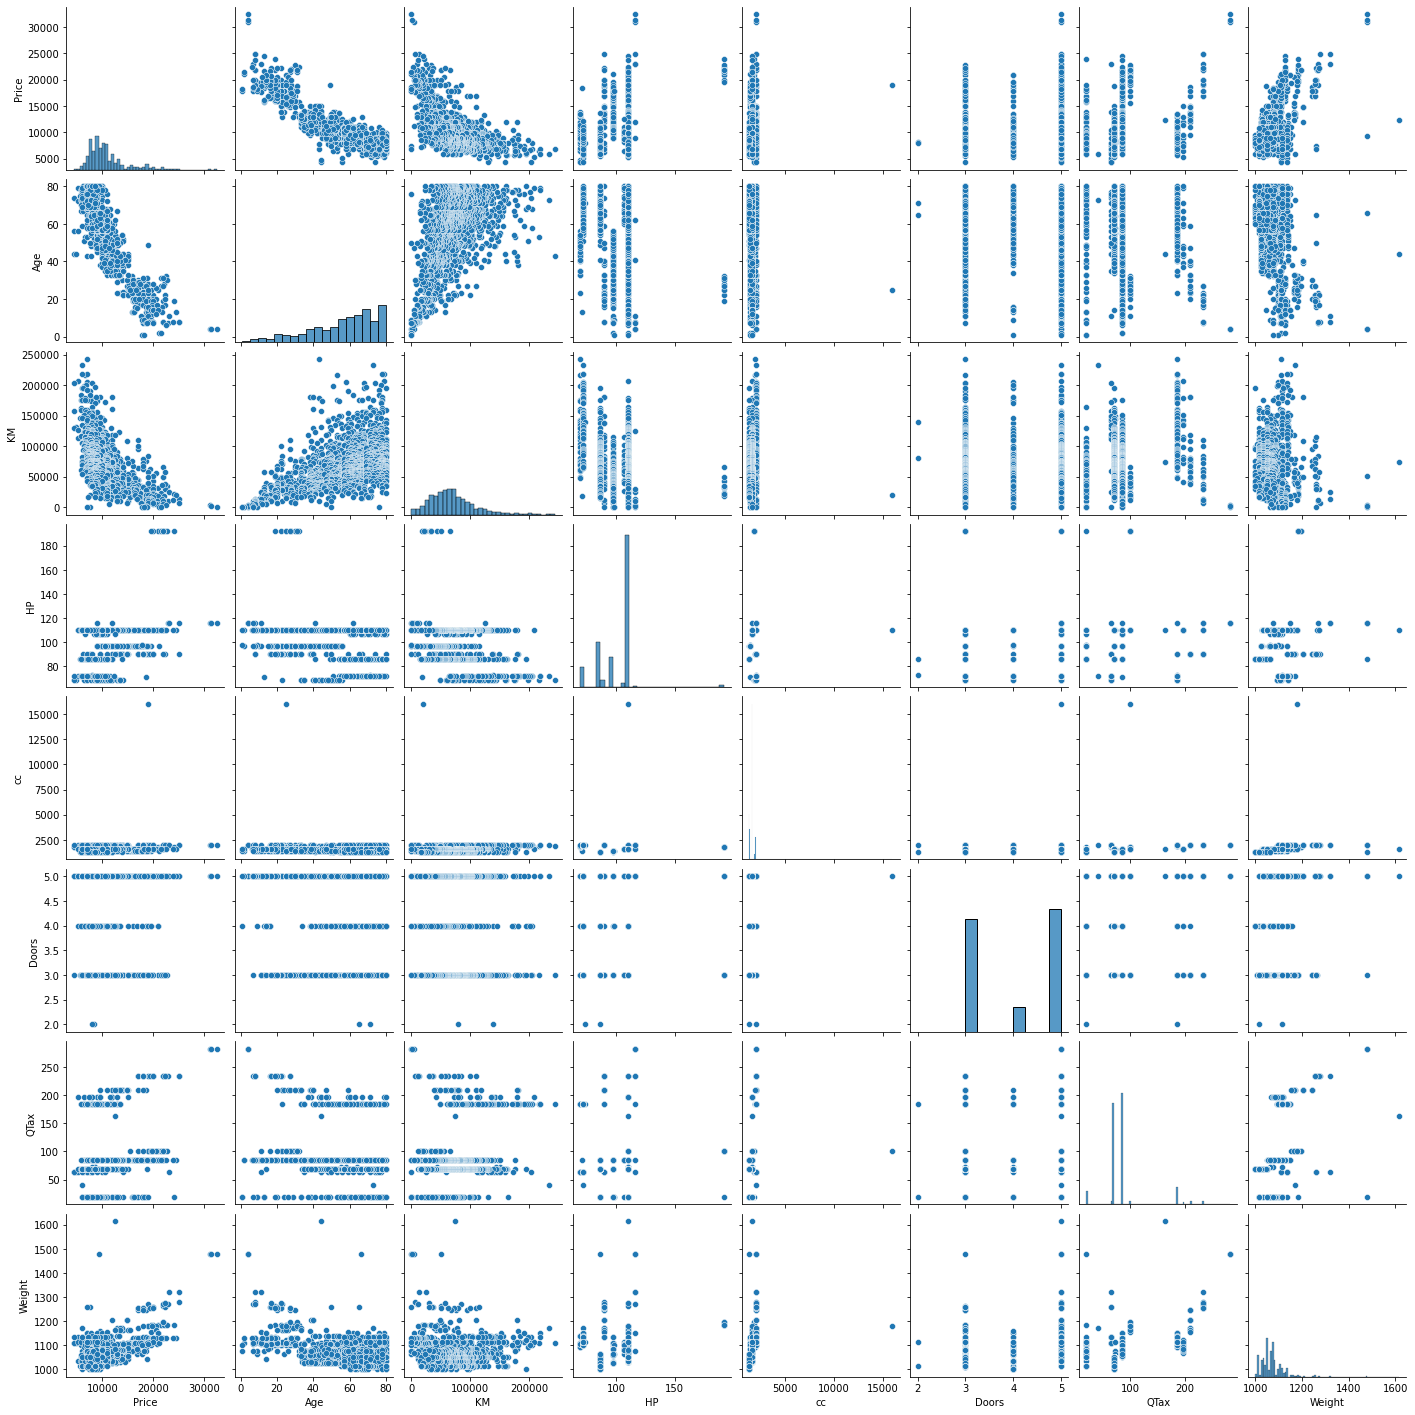

In [21]:
sns.pairplot(data)

In [22]:
X = data.loc[:, data.columns != "Price"]
X

,Age,KM,HP,cc,Doors,QTax,Weight
0,23,46986,90,2000,3,210,1165
1,23,72937,90,2000,3,210,1165
2,24,41711,90,2000,3,210,1165
3,26,48000,90,2000,3,210,1165
4,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,69,1025
1431,72,19000,86,1300,3,69,1015
1432,71,17016,86,1300,3,69,1015
1433,70,16916,86,1300,3,69,1015


In [23]:
Y = data["Price"]
Y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1430     7500
1431    10845
1432     8500
1433     7250
1434     6950
Name: Price, Length: 1435, dtype: int64

## Building of a model

In [24]:
model = smf.ols("Price~Age+KM+HP+cc+Doors+QTax+Weight", data=data).fit()
model.params

Intercept   -2636.384329
Age          -121.847802
KM             -0.020454
HP             33.647877
cc             -0.122677
Doors         -23.980630
QTax            4.035301
Weight         16.884429
dtype: float64

In [25]:
model.fittedvalues

0       16828.839912
1       16298.032122
2       16814.888187
3       16442.555915
4       16233.902063
            ...     
1430     8783.176655
1431     8280.370295
1432     8442.799294
1433     8566.692519
1434    10374.167169
Length: 1435, dtype: float64

In [26]:
model.resid

0      -3328.839912
1      -2548.032122
2      -2864.888187
3      -1492.555915
4      -2483.902063
           ...     
1430   -1283.176655
1431    2564.629705
1432      57.200706
1433   -1316.692519
1434   -3424.167169
Length: 1435, dtype: float64

In [27]:
model.pvalues

Intercept     1.313394e-02
Age          6.480986e-288
KM            4.646226e-55
HP            5.622551e-33
cc            1.745423e-01
Doors         5.425721e-01
QTax          2.158809e-03
Weight        1.297391e-51
dtype: float64

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1269.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:33:18   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.3843   1061.677     -2.483      0.013   -4718.999    -553.770
Age         -121.8478      2.622    -46.476      0.000    -126.991    -116.705
KM            -0.0205      0.001    -16.325      0.000      -0.023      -0.018
HP            33.6479      2.742     12.270      0.000      28.269      39.027
cc            -0.1227      0.090     -1.358      0.175      -0.300       0.054
Doors        -23.9806     39.372     -0.609      0.543    -101.214      53.253
QTax           4.0353      1.313      3.073      0.002       1.459       6.611
Weight        16.8844      1.072     15.743      0.000      14.781      18.988
==============================================================================
Omnibus:                      149.646   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.896
Skew:                          -0.217   Prob(JB):                    1.00e-213
Kurtosis:                       7.027   Cond. No.                     2.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Building linear model with cc and Doors since p-valve is greater than 0.05

In [29]:
model_c = smf.ols("Price~cc", data=data).fit()
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.29e-06
Time:                        01:33:18   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
print(model_c.tvalues,'/n',model_c.pvalues)

Intercept    24.879592
cc            4.745039
dtype: float64 /n Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [31]:
model_d = smf.ols("Price~Doors", data=data).fit()
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.40e-12
Time:                        01:33:18   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(model_d.tvalues,'/n',model_d.pvalues)

Intercept    19.421546
Doors         7.070520
dtype: float64 /n Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [33]:
model_cd = smf.ols("Price~cc+Doors", data=data).fit()
model_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.55e-15
Time:                        01:33:18   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculation of VIF

In [34]:
rsq_a = smf.ols("Age~KM+HP+cc+Doors+QTax+Weight",data=data).fit().rsquared
vif_a = 1 /(1-rsq_a)
vif_a

1.8757013821949635

In [35]:
rsq_k = smf.ols("KM~Age+HP+cc+Doors+QTax+Weight",data=data).fit().rsquared
vif_k = 1 /(1-rsq_k)
vif_k

1.747424088078303

In [36]:
rsq_h = smf.ols("HP~KM+Age+cc+Doors+QTax+Weight",data=data).fit().rsquared
vif_h = 1 /(1-rsq_h)
vif_h

1.3365394975553013

In [37]:
rsq_c = smf.ols("cc~KM+HP+Age+Doors+QTax+Weight",data=data).fit().rsquared
vif_c = 1 /(1-rsq_c)
vif_c

1.1632060295050275

In [38]:
rsq_d = smf.ols("Doors~KM+HP+cc+Age+QTax+Weight",data=data).fit().rsquared
vif_d = 1 /(1-rsq_d)
vif_d

1.114145727886449

In [39]:
rsq_q = smf.ols("QTax~KM+HP+cc+Doors+Age+Weight",data=data).fit().rsquared
vif_q = 1 /(1-rsq_q)
vif_q

2.2908542876983526

In [40]:
rsq_w = smf.ols("Weight~KM+HP+cc+Doors+QTax+Age",data=data).fit().rsquared
vif_w = 1 /(1-rsq_w)
vif_w

2.4869819654051866

In [41]:
VIF = pd.DataFrame({'Variables':['Age','KM','HP','cc','Doors','QTax','Weight'],'vif':[vif_a,vif_k,vif_h,vif_c,vif_d,vif_q,vif_w]})
VIF

,Variables,vif
0,Age,1.875701
1,KM,1.747424
2,HP,1.336539
3,cc,1.163206
4,Doors,1.114146
5,QTax,2.290854
6,Weight,2.486982


## Model Validation 

### Q-Q Plot

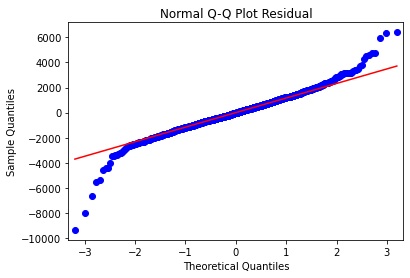

In [42]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot Residual")
plt.show()

## Residual Plot For Homoscedasticity

In [43]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

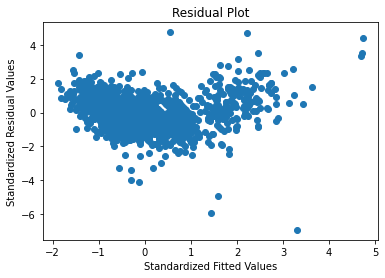

In [44]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

## Residual Vs Regressors

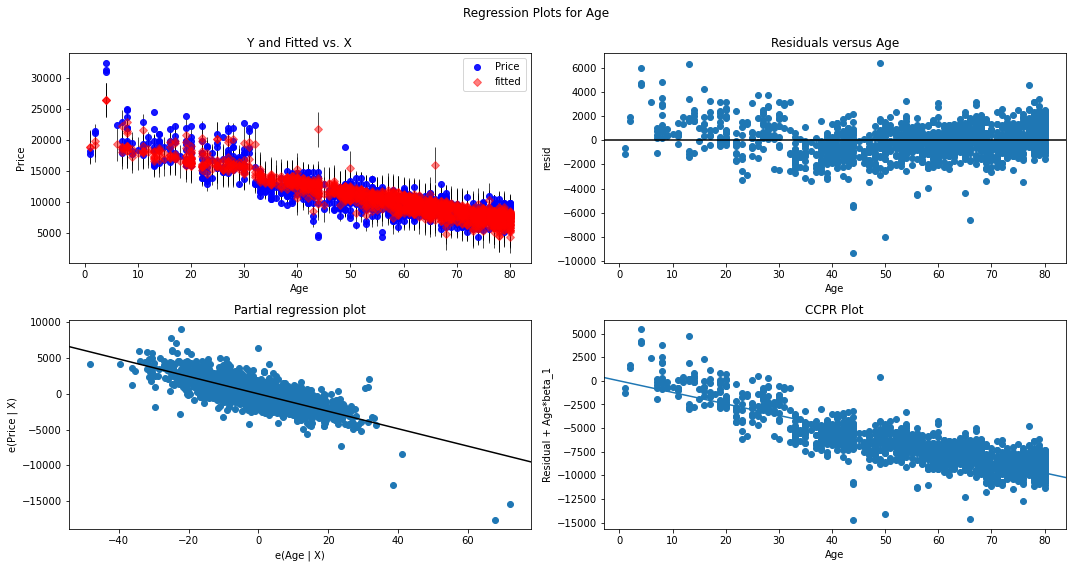

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

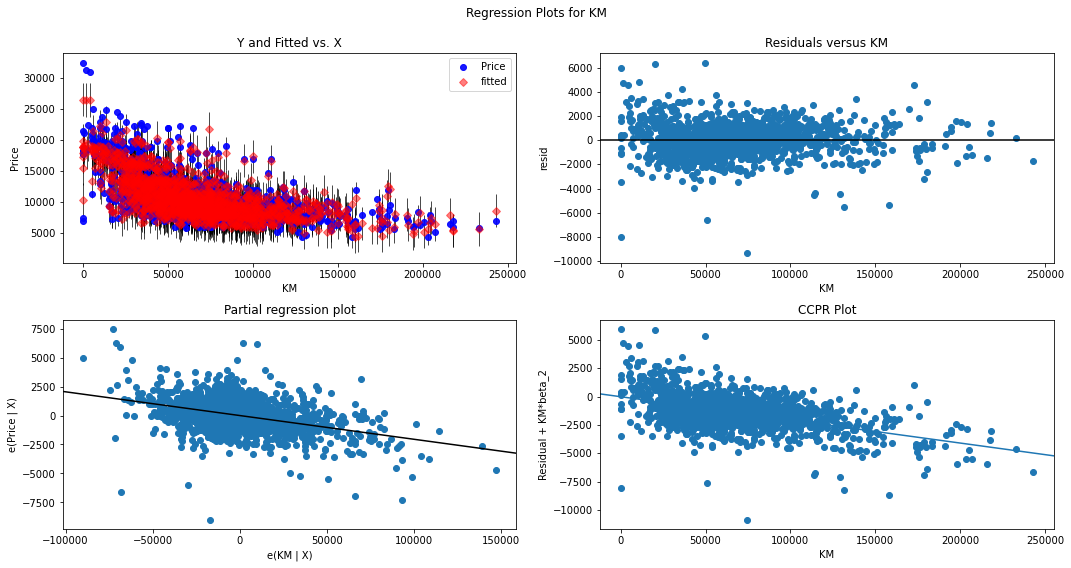

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

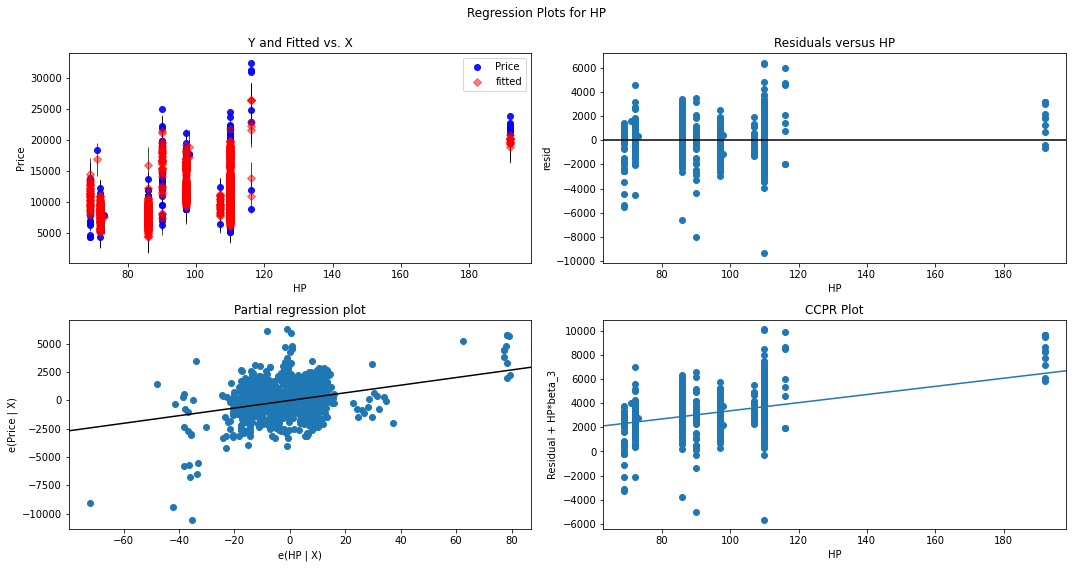

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

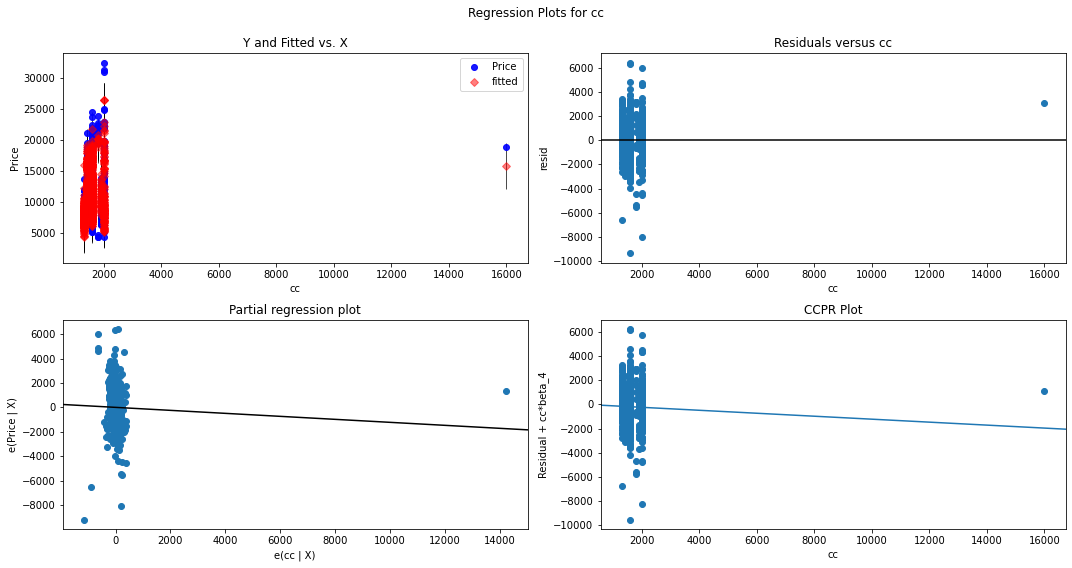

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

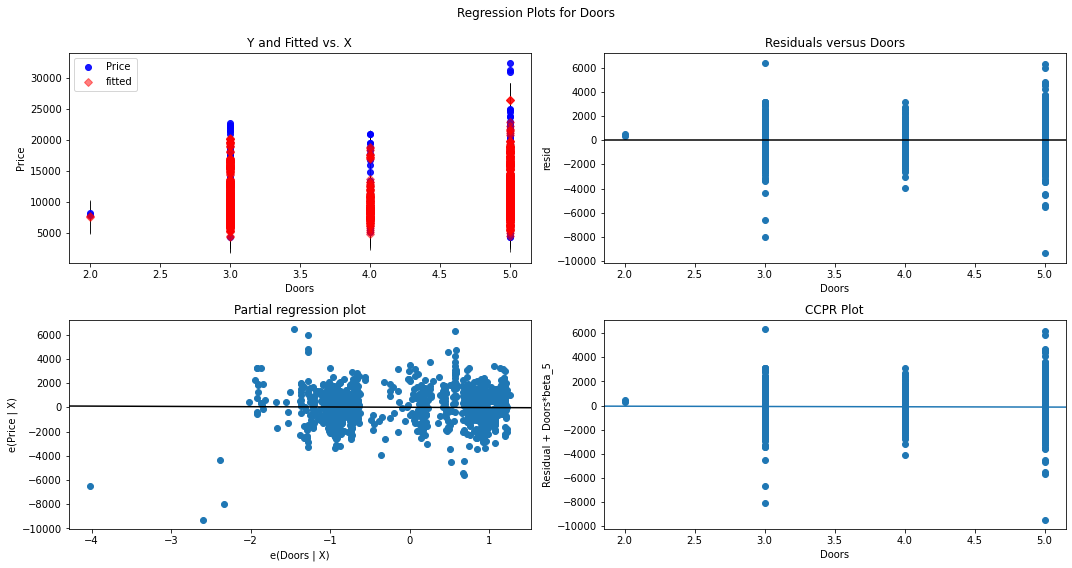

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

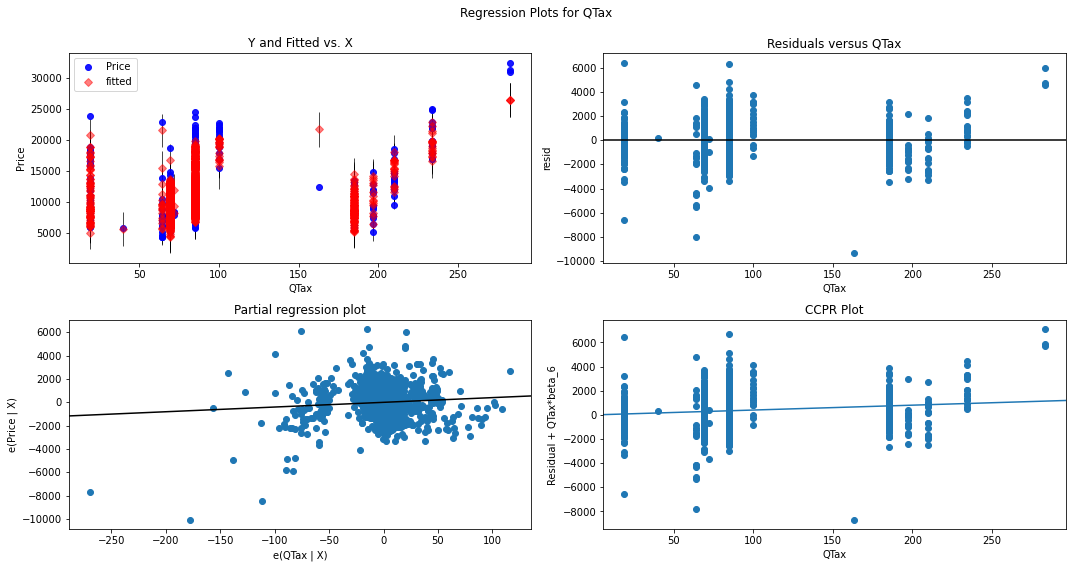

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QTax", fig=fig)
plt.show()

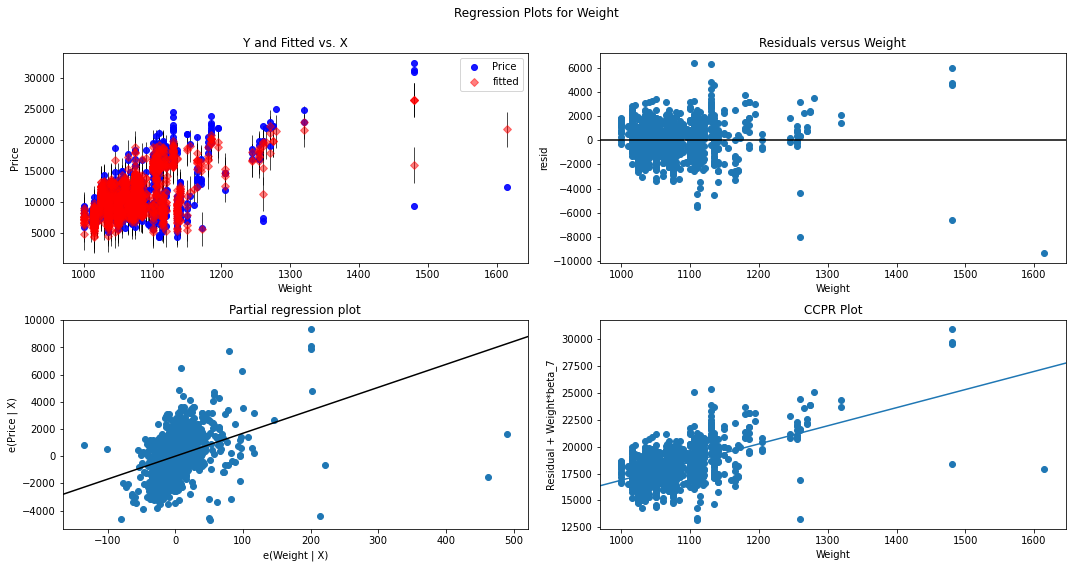

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

## Model Deletion Diagnostic

### Detecting of outliers

### Cook's Distance

In [52]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

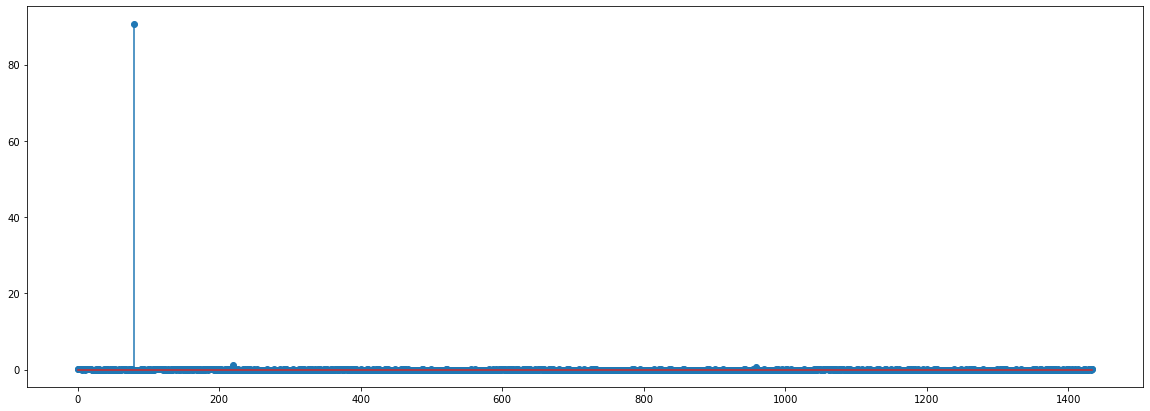

In [53]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.show()

In [54]:
(np.argmax(c),np.max(c))

(80, 90.74324839886548)

In [55]:
data1 = data.drop(data.index[[80]],axis=0).reset_index()
data1

,index,Price,Age,KM,HP,cc,Doors,QTax,Weight
0,0,13500,23,46986,90,2000,3,210,1165
1,1,13750,23,72937,90,2000,3,210,1165
2,2,13950,24,41711,90,2000,3,210,1165
3,3,14950,26,48000,90,2000,3,210,1165
4,4,13750,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,69,1025
1430,1431,10845,72,19000,86,1300,3,69,1015
1431,1432,8500,71,17016,86,1300,3,69,1015
1432,1433,7250,70,16916,86,1300,3,69,1015


In [56]:
data1 = data1.drop(['index'],axis=1)
data1

,Price,Age,KM,HP,cc,Doors,QTax,Weight
0,13500,23,46986,90,2000,3,210,1165
1,13750,23,72937,90,2000,3,210,1165
2,13950,24,41711,90,2000,3,210,1165
3,14950,26,48000,90,2000,3,210,1165
4,13750,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,69,1025
1430,10845,72,19000,86,1300,3,69,1015
1431,8500,71,17016,86,1300,3,69,1015
1432,7250,70,16916,86,1300,3,69,1015


In [57]:
model1 = smf.ols("Price~Age+KM+HP+cc+Doors+QTax+Weight",data=data1).fit()

In [58]:
model_influence1 = model1.get_influence()
(c_1, _) = model_influence1.cooks_distance

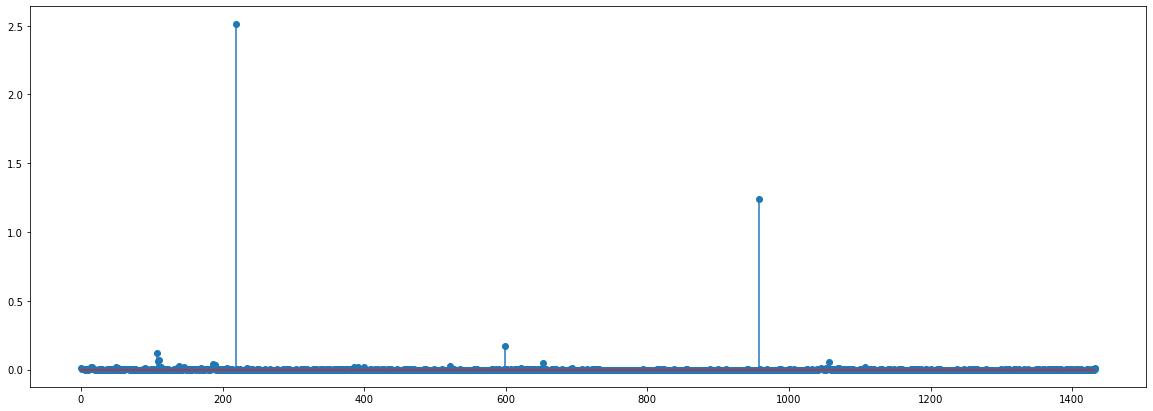

In [59]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_1,3))
plt.show()

In [60]:
(np.argmax(c_1),np.max(c_1))

(219, 2.515195943378715)

In [61]:
data2 = data1.drop(data.index[[219]],axis=0).reset_index()
data2

,index,Price,Age,KM,HP,cc,Doors,QTax,Weight
0,0,13500,23,46986,90,2000,3,210,1165
1,1,13750,23,72937,90,2000,3,210,1165
2,2,13950,24,41711,90,2000,3,210,1165
3,3,14950,26,48000,90,2000,3,210,1165
4,4,13750,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,3,69,1025
1429,1430,10845,72,19000,86,1300,3,69,1015
1430,1431,8500,71,17016,86,1300,3,69,1015
1431,1432,7250,70,16916,86,1300,3,69,1015


In [62]:
data2 = data2.drop(['index'],axis=1)
data2

,Price,Age,KM,HP,cc,Doors,QTax,Weight
0,13500,23,46986,90,2000,3,210,1165
1,13750,23,72937,90,2000,3,210,1165
2,13950,24,41711,90,2000,3,210,1165
3,14950,26,48000,90,2000,3,210,1165
4,13750,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,69,1025
1429,10845,72,19000,86,1300,3,69,1015
1430,8500,71,17016,86,1300,3,69,1015
1431,7250,70,16916,86,1300,3,69,1015


In [63]:
data2.shape

(1433, 8)

In [64]:
model2 = smf.ols("Price~Age+KM+HP+cc+Doors+QTax+Weight",data=data2).fit()

In [65]:
model_influence2 = model2.get_influence()
(c_2, _) = model_influence2.cooks_distance

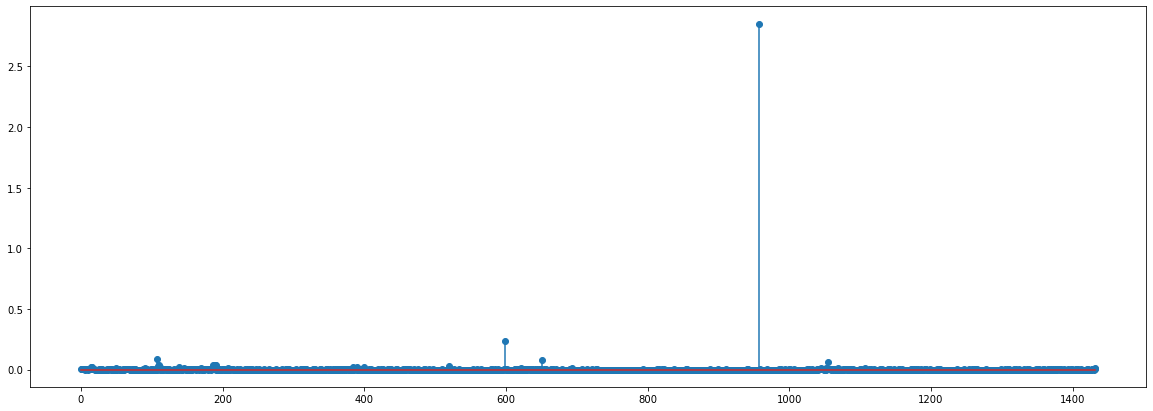

In [66]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_2,3))
plt.show()

In [67]:
(np.argmax(c_2),np.max(c_2))

(957, 2.852576041482381)

In [68]:
data3 = data2.drop(data2.index[[957]],axis=0).reset_index()
data3 = data3.drop(['index'],axis=1)
data3

,Price,Age,KM,HP,cc,Doors,QTax,Weight
0,13500,23,46986,90,2000,3,210,1165
1,13750,23,72937,90,2000,3,210,1165
2,13950,24,41711,90,2000,3,210,1165
3,14950,26,48000,90,2000,3,210,1165
4,13750,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,69,1025
1428,10845,72,19000,86,1300,3,69,1015
1429,8500,71,17016,86,1300,3,69,1015
1430,7250,70,16916,86,1300,3,69,1015


In [69]:
model3 = smf.ols("Price~Age+KM+HP+cc+Doors+QTax+Weight",data=data3).fit()

In [70]:
model_influence3 = model3.get_influence()
(c_3, _) = model_influence3.cooks_distance

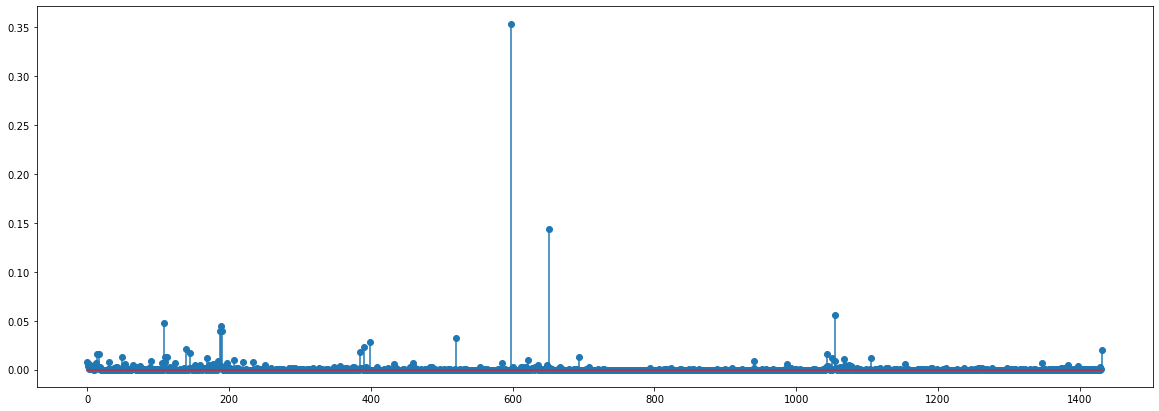

In [71]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c_3,3))
plt.show()

In [72]:
(np.argmax(c_3),np.max(c_3))

(598, 0.3544908763795165)

### Since the value < 1 we can stop the diagnostic process and finalize the model

In [73]:
final_model = smf.ols("Price~Age+KM+HP+cc+Doors+QTax+Weight",data=data3).fit()

In [74]:
final_model.pvalues

Intercept     7.928166e-26
Age          1.042557e-276
KM            1.726210e-41
HP            1.510353e-43
cc            9.132581e-35
Doors         1.413877e-04
QTax          9.789564e-05
Weight       1.514344e-104
dtype: float64

In [75]:
final_model.tvalues

Intercept   -10.717068
Age         -45.109525
KM          -13.938254
HP           14.318796
cc          -12.635639
Doors        -3.816098
QTax          3.906841
Weight       23.646485
dtype: float64

In [76]:
final_model.rsquared

0.8834267636055576

In [77]:
final_model.aic

24457.905518397823

In [78]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1542.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:33:24   Log-Likelihood:                -12221.
No. Observations:                1432   AIC:                         2.446e+04
Df Residuals:                    1424   BIC:                         2.450e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.252e+04   1168.266    -10.717      0.000   -1.48e+04   -1.02e+04
Age         -112.1150      2.485    -45.110      0.000    -116.990    -107.240
KM            -0.0167      0.001    -13.938      0.000      -0.019      -0.014
HP            38.2590      2.672     14.319      0.000      33.018      43.500
cc            -3.8262      0.303    -12.636      0.000      -4.420      -3.232
Doors       -140.6737     36.863     -3.816      0.000    -212.986     -68.362
QTax           5.3665      1.374      3.907      0.000       2.672       8.061
Weight        30.6772      1.297     23.646      0.000      28.132      33.222
==============================================================================
Omnibus:                      122.315   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              705.579
Skew:                          -0.094   Prob(JB):                    6.10e-154
Kurtosis:                       6.434   Cond. No.                     2.80e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

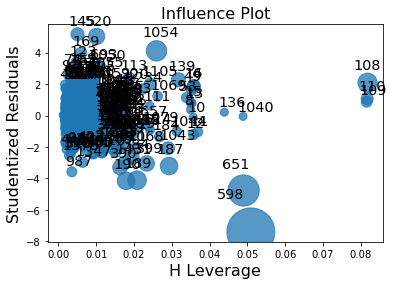

In [79]:
influence_plot(final_model)
plt.show()

In [80]:
final_model.fittedvalues

0       16350.867937
1       15917.303464
2       16326.882630
3       15997.582119
4       15861.225221
            ...     
1427     9109.132380
1428     8491.811119
1429     8637.072851
1430     8750.858514
1431    10618.506524
Length: 1432, dtype: float64

In [81]:
final_model.resid

0      -2850.867937
1      -2167.303464
2      -2376.882630
3      -1047.582119
4      -2111.225221
           ...     
1427   -1609.132380
1428    2353.188881
1429    -137.072851
1430   -1500.858514
1431   -3668.506524
Length: 1432, dtype: float64

In [82]:
data3["Predicted"] = final_model.fittedvalues
data3["Errors"] = final_model.resid

In [83]:
data3

,Price,Age,KM,HP,cc,Doors,QTax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,210,1165,16350.867937,-2850.867937
1,13750,23,72937,90,2000,3,210,1165,15917.303464,-2167.303464
2,13950,24,41711,90,2000,3,210,1165,16326.882630,-2376.882630
3,14950,26,48000,90,2000,3,210,1165,15997.582119,-1047.582119
4,13750,30,38500,90,2000,3,210,1170,15861.225221,-2111.225221
...,...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,69,1025,9109.132380,-1609.132380
1428,10845,72,19000,86,1300,3,69,1015,8491.811119,2353.188881
1429,8500,71,17016,86,1300,3,69,1015,8637.072851,-137.072851
1430,7250,70,16916,86,1300,3,69,1015,8750.858514,-1500.858514
